우선, 필요한 라이브러리를 불러오고, boston이라는 이름으로 파일 읽어오기

In [9]:
import numpy as np
import pandas as pd

import scipy as sp
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import seaborn as sns
import matplotlib.pyplot as plt

boston = pd.read_csv("house_price.csv")

In [11]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT.MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0


독립변수
1. CRIM: 범죄율
2. ZN: 25000 평방피트를 초과 거주지역 비율
3. INDUS: 비-소매상업지역 면접 비율
4. CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
5. NOX: 일산화질소 농도
6. RM: 주택당 방 수
7. AGE: 1940년 이전에 전축된 주택의 비율
8. DIS: 직업센터의 거리
9. RAD: 방사형 고속도로까지의 거리
10. TAX: 재산세율
11. PTRATIO: 학생/교사 비율
12. B: 인구 중 흑인 비율
13. LSTAT: 인구 중 하위 계층 비율

종속변수
1. MEDV: 주택가격

우선, ZN은 25000평방피트를 초과하는 거주지역의 비율인데, 25000평방피트를 초과하는 주택의 비율의 수가 많지 않을 것으로 예상되어 제외한다.
또한, CHAS의 경우 찰스강에 인접하더라도 공장지역인 경우 주택가격이 낮을 수 있고, 공장지역이 아닌데 찰스강에 인접한 경우에는 주택가격이 높을 수 있으므로 상관관계를 정확히 파악하기 어려우므로 제외한다.
위의 CSV 파일을 봤을 때, 25000평방피트를 초과하는 거주지역의 비율이 18%가 되는 지역과 0%인 지역 사이에 AGE 변수와 NOX 변수가 크게 관련이 없음이 보이므로 AGE와 NOX 변수를 제외한다.

따라서, CRIM, INDUS, RM, DIS, RAD, TAX, PTRATIO, B, LSTAT을 독립변수로 활용한다.

한편, CAT.MEDV는 MEDV에서 파생된 속성으로 보이기 때문에 둘의 상관관계를 파악하여 둘이 비슷한 변수인 경우에는 사용하지 않는 것이 좋다.

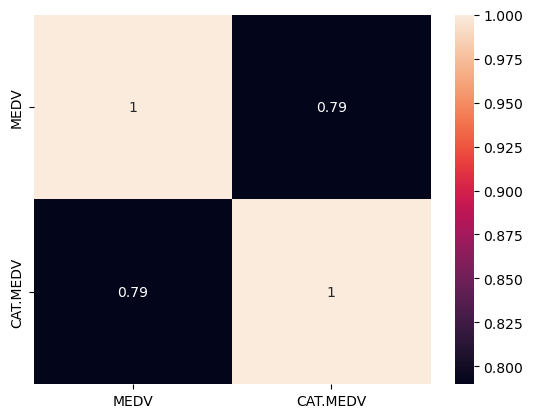

In [20]:
import seaborn as sns
sns.heatmap(boston[['MEDV','CAT.MEDV']].corr(),annot=True)
plt.show()

둘의 상관관계가 높음을 알 수 있으므로 CAT.MEDV는 drop으로 없애야한다.

In [23]:
boston.drop(labels="CAT.MEDV",axis=1,inplace=True)

ZN CHAS AGE NOX 이 네 변수를 제외하기로 했으므로 마찬가지로 drop으로 업애야한다.

In [26]:
boston.drop(labels=['ZN','CHAS','AGE','NOX'],axis=1,inplace=True)

## 독립변수와 종속변수 나누기

X를 독립변수, y를 종속변수로 나눠야 한다.
즉, 독립변수에는 MEDV컬럼이 제외되어야 하고, 종속변수에는 MEDV컬럼만이 사용되어야 한다.

In [29]:
X = boston.drop(labels='MEDV',axis=1)
y = boston["MEDV"]

## 테스트데이터와 훈련데이터로 나누기

모델을 학습시키기 위해 훈련데이터를 구분하고, 모델을 검증하기 위하여 테스트데이터를 나눠야 한다.
이때, train_test_split을 사용해야 한다.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

## Sklearn으로 다중회귀하기

In [35]:
from sklearn.linear_model import LinearRegression   #선형회귀 불러오기
Lr_skl = LinearRegression()  #Lr_skl 변수에 선형회귀를 저장
Lr_skl.fit(X_train,y_train)  #Lr_skl에 훈련데이터들을 fit 시키기
y_pred_skl=Lr_skl.predict(X_test) #fit 시켰으니까 독립변수의 테스트데이터들로 예측해서 y_pred_skl변수에 저장하기
y_pred_skl

array([18.72935254, 16.3944723 , 22.19315123, 14.27243425, 38.06800633,
       19.98331626, 27.42033891, 26.39077175, 20.35968628, 33.00873039,
       39.12748826, 25.59575437, 16.99236382, 43.75185773, 34.62982889,
       23.82290775, 21.72379818,  9.3661695 ,  8.99643452, 31.5204371 ,
       22.83789124, 13.47768637, 12.58949501, 32.03851238, 12.93907855,
       19.08189259, 20.7025474 , 26.28930951, 22.58203773, 12.30361311,
       19.97622575, 28.719066  , 12.66855428, 25.30813383, 28.98413845,
       17.02192129, 25.77152131, 18.79174127, 33.25880978, 23.41354717,
       19.80325546, 27.79287976, 28.9252903 , 32.1925701 ,  8.44482764,
       28.82666381, 22.63531577, 27.42913631, 24.48106499, 28.57145084,
       12.41970707, 42.21094489, 20.71206297, 31.84651249, 19.74699538,
       22.40676933, 25.40856676, 23.73937893, 30.89532053, 23.60446519,
       36.3297726 , 21.25375795, 12.93880774, 24.99676055, 26.53337031,
       21.16658853, 22.85473651, 26.73516505, 20.96295562,  0.98

위에 나오는 데이터들은 학습데이터들로 학습시키고 나서, 미리 제외해둔 테스트데이터의 종속변수들 넣었을 때 어떤 값들이 나타나는지 확인한 것!

## 다중공선성 확인

위의 다중회귀는 독립변수가 상당히 많아서 정확성이 떨어질 수 있다. 즉, 다중공선성을 확인해서 필요없는 변수를 제거할 필요가 있다.

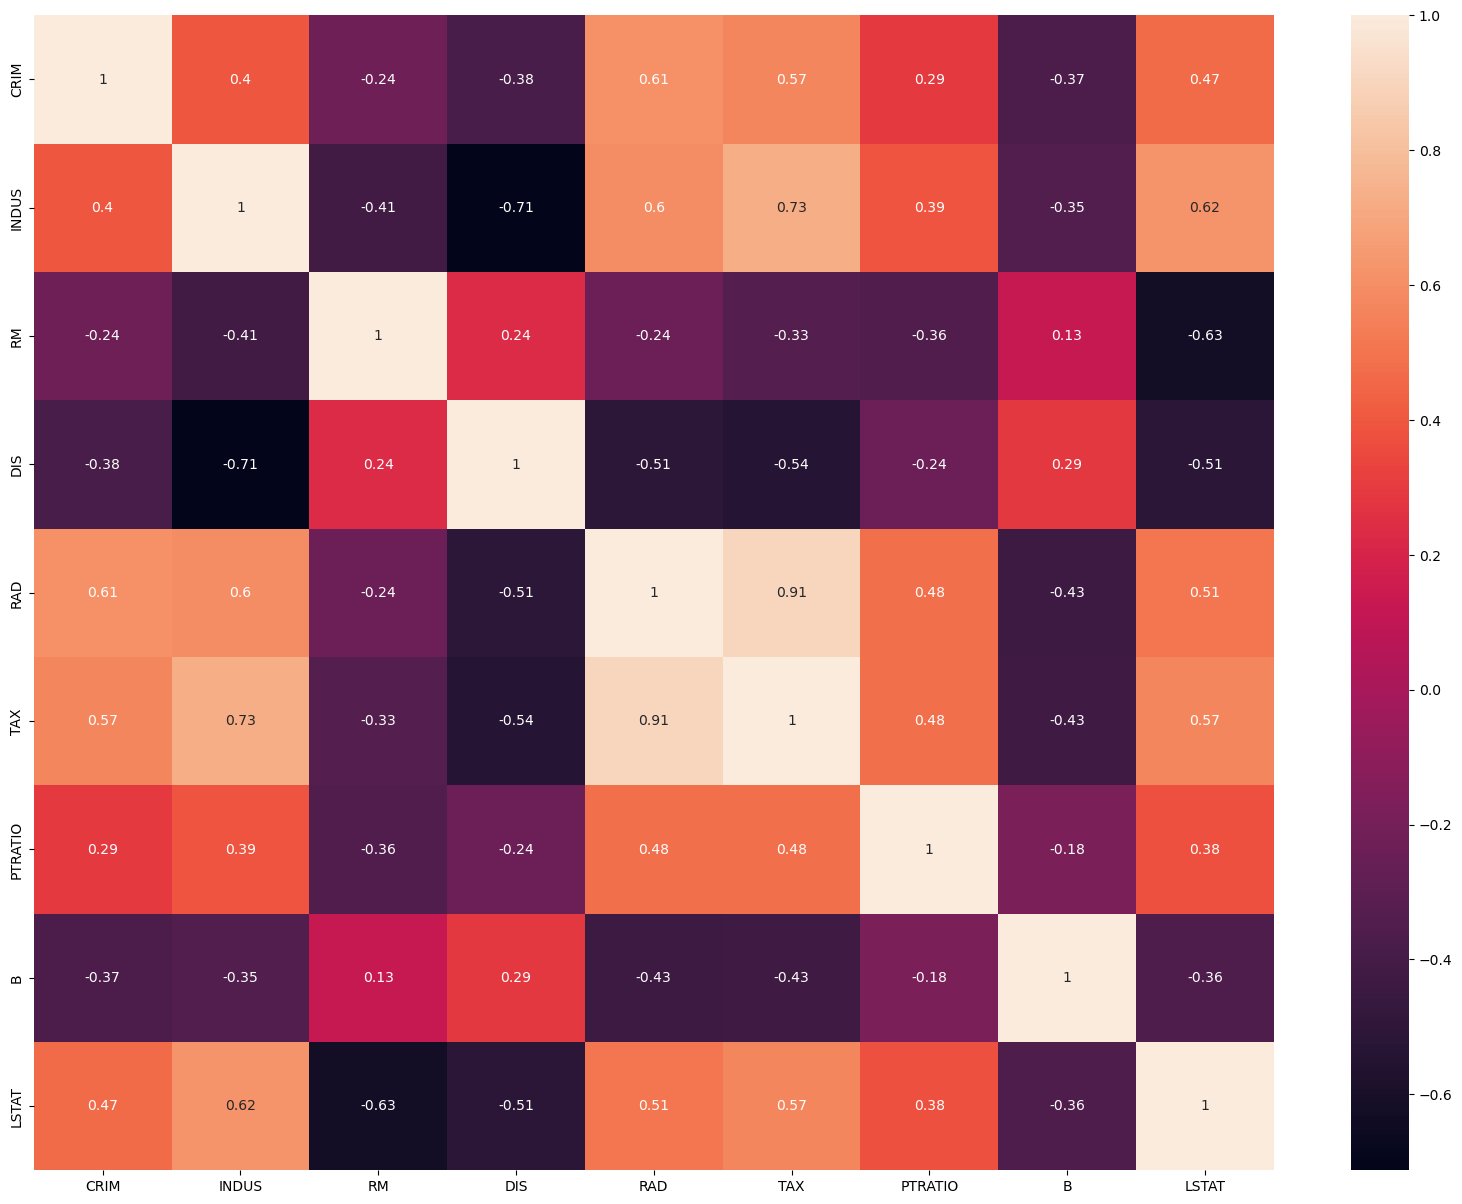

In [41]:
import seaborn as sns
plt.figure(figsize=(20,15))

sns.heatmap(X_train.corr(), annot=True)
plt.show()

In [43]:
X.corr()

,CRIM,INDUS,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,0.406583,-0.219247,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
INDUS,0.406583,1.000000,-0.391676,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
RM,-0.219247,-0.391676,1.000000,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
DIS,-0.379670,-0.708027,0.205246,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,0.595129,-0.209847,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,0.720760,-0.292048,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993
PTRATIO,0.289946,0.383248,-0.355501,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044
B,-0.385064,-0.356977,0.128069,0.291512,-0.444413,-0.441808,-0.177383,1.000000,-0.366087
LSTAT,0.455621,0.603800,-0.613808,-0.496996,0.488676,0.543993,0.374044,-0.366087,1.000000


## VIF를 이용하여 다중공선성 확인하기

VIF=1: 독립변수는 다른 변수와 상관관계가 전혀 없음

VIF<5: 일반적으로 다중공선성 문제가 없음

VIF>5: 다중공선성의 징후가 있을 수 있으며, 주의가 필요

VIF>10: 다중공선성이 심각하여 조치가 필요

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(X):
    vif_data = pd.DataFrame()             #vif에 대한 데이터를 데이터프레임에 넣는다.
    vif_data["features"] = X.columns      #이때, vif에 대한 데이터의 피처들을 컬럼으로 잡는다.
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print(vif_data)                       #X(독립변수)의 열의 개수만큼 반복할건데, 그 독립변수의 value값들을 확인할거다.
vif(X)

  features        VIF
0     CRIM   2.075253
1    INDUS  12.804961
2       RM  45.076407
3      DIS   8.605255
4      RAD  14.776126
5      TAX  55.845442
6  PTRATIO  71.868133
7        B  19.672618
8    LSTAT   8.175348


vif가 높은 변수를 하나 없애면, 다시 다른 변수에도 영향을 미쳐서 하나씩 제거하면서 확인해야한다.

In [56]:
vif(X.drop('PTRATIO',axis=1))

  features        VIF
0     CRIM   2.075087
1    INDUS  12.371064
2       RM  30.317344
3      DIS   7.831135
4      RAD  14.724239
5      TAX  55.012137
6        B  18.004590
7    LSTAT   6.911632


In [60]:
vif(X.drop(['PTRATIO','TAX'],axis=1))

  features        VIF
0     CRIM   2.074638
1    INDUS   8.882269
2       RM  27.323636
3      DIS   7.422942
4      RAD   4.964237
5        B  17.938068
6    LSTAT   6.693725


In [62]:
vif(X.drop(['PTRATIO','TAX','RM'],axis=1))

  features       VIF
0     CRIM  2.072454
1    INDUS  8.028123
2      DIS  5.595192
3      RAD  4.685531
4        B  9.836965
5    LSTAT  6.688106


PTRATIO, TAX, RM 변수를 지운 결과 모두 10보다 작은 값이 나타났다.

# 모델 평가하기

사용하지 않는 컬럼을 DROP, 다중공선성 확인, t값과 p-value 확인 진행하기

In [68]:
boston.drop(labels=['PTRATIO','TAX','RM'],axis=1,inplace=True)

X = boston.drop(labels="MEDV", axis=1)
y = boston['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

from sklearn.linear_model import LinearRegression
lr_skl = LinearRegression()
lr_skl.fit(X_train, y_train)
y_pred_skl = lr_skl.predict(X_test)     #훈련데이터들을 학습해서 테스트데이터들로 나타낸 결과
y_pred_skl

array([18.32149123, 19.28496812, 26.12188589, 14.1200673 , 32.81190183,
       21.1603642 , 29.69459758, 27.13049659, 20.2611886 , 31.04387443,
       31.18549664, 22.81274617, 16.87531038, 33.56852845, 31.70430628,
       21.68072844, 22.41486216,  7.45960301,  4.91792445, 31.03307838,
       26.57793604, 15.23046545, 15.79201682, 32.27015569, 16.74234339,
       15.66156331, 18.18461224, 28.32476908, 25.86201206, 12.15212086,
       20.77868394, 30.57475227, 13.78292739, 25.77125334, 29.2163753 ,
       19.93341313, 25.25913897, 16.61021528, 30.99165325, 22.00932709,
       21.74017088, 26.02565841, 28.30485519, 30.55028291,  6.602527  ,
       28.45880718, 26.14569166, 26.38765797, 25.73104148, 29.04026998,
       12.72623417, 31.89399741, 21.10866333, 32.4578974 , 15.68657308,
       21.17504873, 28.04223456, 25.57140396, 28.69948481, 28.02926512,
       34.35713731, 26.6252044 , 10.54313519, 23.59056956, 26.60409723,
       25.80267258, 27.73385933, 28.9556556 , 22.72285277,  1.41

In [70]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

test_mse_skl = mean_squared_error(y_test, y_pred_skl)
test_mae_skl = mean_absolute_error(y_test, y_pred_skl)
test_r2_skl = r2_score(y_test, y_pred_skl)

X_train = sm.add_constant(X_train)     #statasmodels에서는 상수항 추가를 직접 작성해야 한다.

model=sm.OLS(y_train,X_train)          #최소제곱법으로 모델 생성
model_trained=model.fit()              #모델을 학습시키기 위해 fit 사용

print(model_trained.summary())         #학습시킨 모델에 대한 요약 

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     104.6
Date:                Tue, 25 Mar 2025   Prob (F-statistic):           1.36e-78
Time:                        11:48:44   Log-Likelihood:                -1289.8
No. Observations:                 404   AIC:                             2594.
Df Residuals:                     397   BIC:                             2622.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.7534      2.093     19.476      0.0

## 결과

P>|t| 값을 확인하면 0.05보다 작아야 유의미한데, rad와 b를 제외하고는 0.05보다 작은, 즉 유의미한 수치를 보이고 있다.
또한, 마찬가지로 t값을 확인하면 rad와 b를 제외하고는 상관도가 매우 큰 것을 확인할 수 있다.